In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

# Set style
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")


In [15]:
# Load dataset
df = pd.read_csv('cleandata.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()


Dataset shape: (9994, 21)

First few rows:


,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,...,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date,total_sales
0,CUST2353,Erica,Oliver,Female,Teenagers,2022-06-29,Canada,PROD108,Fitbit Versa 3,Electronics,...,229,ORD10000,2023-07-13,Pending,Credit Card,2,good,REV20000,2025-06-06,687.0
1,CUST4463,Christopher,White,Male,Adults,2023-08-24,China,PROD103,Levi's Jeans,Apparel,...,59,ORD10001,2024-08-12,Pending,PayPal,2,average,REV20001,2023-08-05,236.0
2,CUST4512,Spencer,Foster,Male,Senior,2023-07-18,Germany,PROD111,Lego Star Wars Set,Toys,...,59,ORD10002,2024-08-04,Delivered,Cash on Delivery,5,good,REV20002,2023-01-03,118.0
3,CUST3317,Ashley,Bridges,Male,Teenagers,2025-08-22,France,PROD107,Dyson Vacuum,Home & Kitchen,...,399,ORD10003,2025-05-23,Delivered,Cash on Delivery,2,very good,REV20003,2023-03-14,1596.0
4,CUST1296,Amy,Johnson,Female,Teenagers,2021-03-23,Brazil,PROD105,Adidas Running Shoes,Apparel,...,110,ORD10004,2023-07-02,Returned,Cash on Delivery,1,very good,REV20004,2023-10-18,110.0


CORRELATION MATRIX - ALL ATTRIBUTES (SEMUA KOLOM)


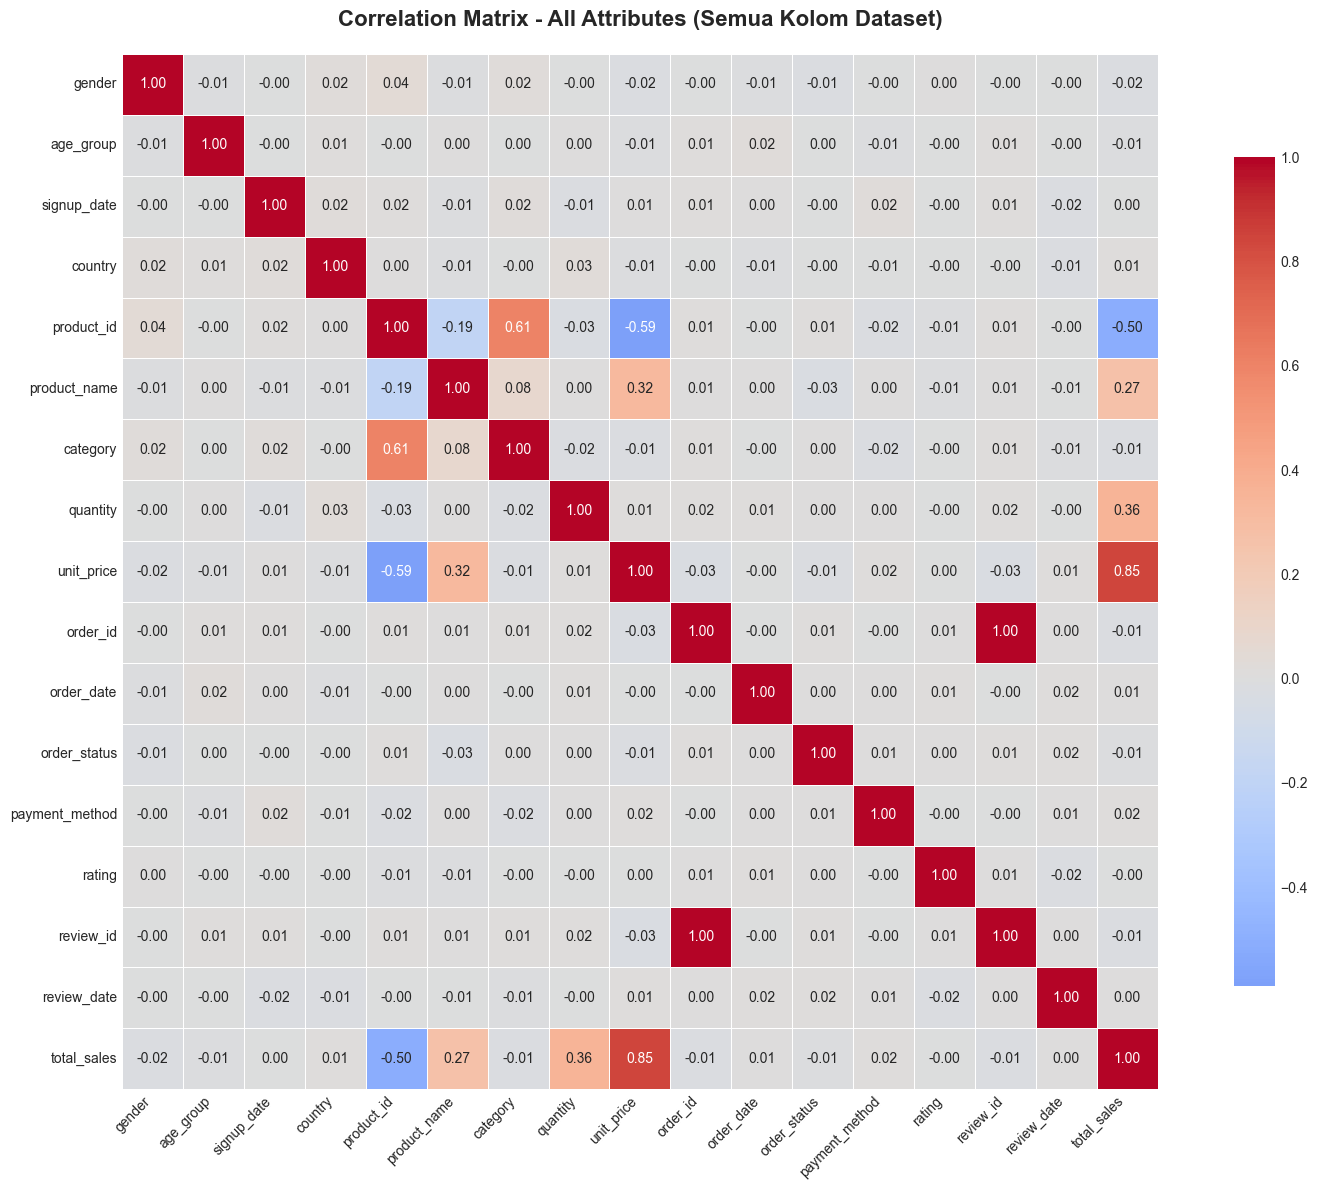


Correlation Matrix Values (All Attributes):
                  gender  age_group  signup_date   country  product_id  \
gender          1.000000  -0.007856    -0.004044  0.019783    0.038323   
age_group      -0.007856   1.000000    -0.001209  0.009818   -0.002438   
signup_date    -0.004044  -0.001209     1.000000  0.020976    0.016420   
country         0.019783   0.009818     0.020976  1.000000    0.004807   
product_id      0.038323  -0.002438     0.016420  0.004807    1.000000   
product_name   -0.008468   0.000984    -0.007259 -0.010464   -0.190646   
category        0.019505   0.000593     0.020355 -0.002609    0.607426   
quantity       -0.000696   0.002765    -0.012532  0.030030   -0.025003   
unit_price     -0.017784  -0.007016     0.005296 -0.005780   -0.588931   
order_id       -0.002010   0.008934     0.013619 -0.000745    0.014115   
order_date     -0.006028   0.021272     0.002899 -0.008528   -0.004009   
order_status   -0.012986   0.000376    -0.001595 -0.000467    0.013

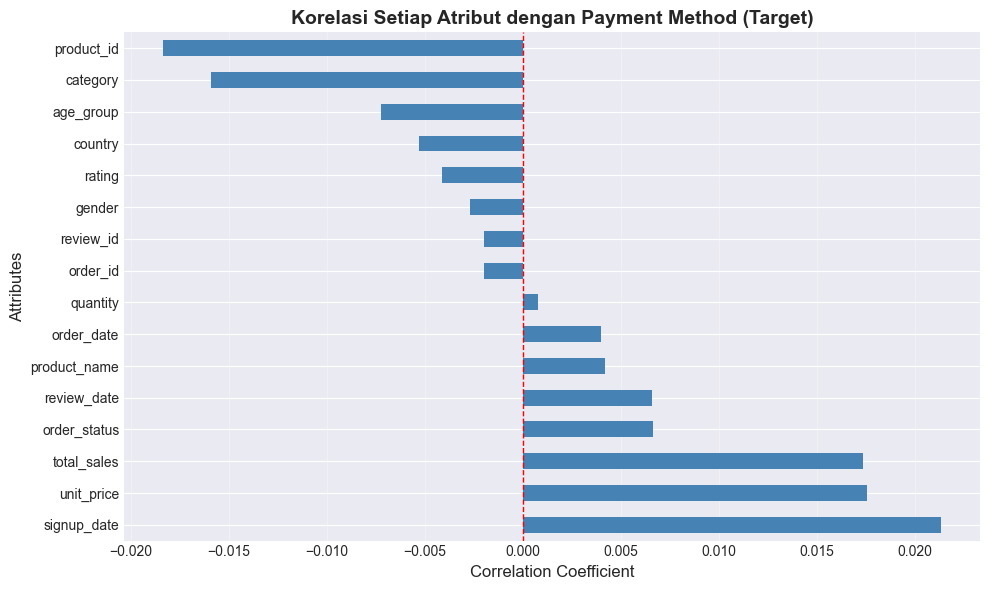

In [26]:
# Correlation Matrix - ALL ATTRIBUTES (termasuk kategorikal)
print("=" * 80)
print("CORRELATION MATRIX - ALL ATTRIBUTES (SEMUA KOLOM)")
print("=" * 80)

# Encode semua kolom kategorikal untuk correlation matrix
df_encoded_corr = df.copy()

# Exclude kolom yang tidak perlu untuk correlation (ID, nama, text)
exclude_for_corr = ['customer_id', 'first_name', 'last_name', 'review_text']
cols_to_encode = [col for col in df_encoded_corr.columns if col not in exclude_for_corr]

# Encode kolom kategorikal
label_encoders_corr = {}
for col in cols_to_encode:
    if df_encoded_corr[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded_corr[col] = le.fit_transform(df_encoded_corr[col].astype(str))
        label_encoders_corr[col] = le

# Hitung correlation matrix untuk semua atribut
corr_matrix_all = df_encoded_corr[cols_to_encode].corr()

# Visualisasi correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_all, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, center=0, square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Attributes (Semua Kolom Dataset)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix Values (All Attributes):")
print(corr_matrix_all)

# Tampilkan korelasi dengan payment_method jika ada
if 'payment_method' in corr_matrix_all.columns:
    print("\n" + "=" * 80)
    print("KORELASI SETIAP ATRIBUT DENGAN PAYMENT_METHOD (TARGET)")
    print("=" * 80)
    corr_with_payment = corr_matrix_all['payment_method'].sort_values(ascending=False)
    print(corr_with_payment)
    
    # Visualisasi korelasi dengan target
    plt.figure(figsize=(10, 6))
    corr_with_payment.drop('payment_method').plot(kind='barh', color='steelblue')
    plt.title('Korelasi Setiap Atribut dengan Payment Method (Target)', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel('Attributes', fontsize=12)
    plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()


Payment Method Distribution:
payment_method
Cash on Delivery    3407
PayPal              3299
Credit Card         3288
Name: count, dtype: int64

Payment Method Percentages:
payment_method
Cash on Delivery    34.090454
PayPal              33.009806
Credit Card         32.899740
Name: proportion, dtype: float64


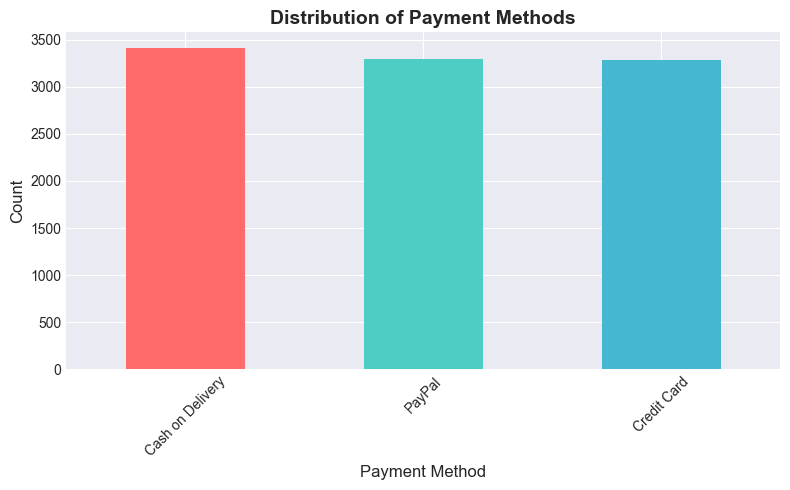

In [17]:
# Check target variable distribution
print("Payment Method Distribution:")
print(df['payment_method'].value_counts())
print("\nPayment Method Percentages:")
print(df['payment_method'].value_counts(normalize=True) * 100)

# Visualize target distribution
plt.figure(figsize=(8, 5))
df['payment_method'].value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Distribution of Payment Methods', fontsize=14, fontweight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Data preprocessing
# Select features for classification berdasarkan kolom yang dipilih
# Feature columns yang digunakan:
feature_cols = ['country', 'age_group', 'category', 'total_sales', 'gender', 'unit_price', 'quantity']

print("=" * 80)
print("FEATURE COLUMNS YANG DIGUNAKAN:")
print("=" * 80)
print("Feature columns:", feature_cols)
print(f"Total features: {len(feature_cols)}")

# Create feature dataframe
X = df[feature_cols].copy()
y = df['payment_method'].copy()

print("\nFeature columns info:")
print(X.info())
print("\nSample data (first 5 rows):")
print(X.head())


Feature columns: ['gender', 'age_group', 'signup_date', 'country', 'category', 'quantity', 'unit_price', 'order_date', 'order_status', 'rating', 'review_date', 'total_sales']

Feature columns info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        9994 non-null   object 
 1   age_group     9994 non-null   object 
 2   signup_date   9994 non-null   object 
 3   country       9994 non-null   object 
 4   category      9994 non-null   object 
 5   quantity      9994 non-null   float64
 6   unit_price    9994 non-null   int64  
 7   order_date    9993 non-null   object 
 8   order_status  9994 non-null   object 
 9   rating        9994 non-null   int64  
 10  review_date   9994 non-null   object 
 11  total_sales   9994 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 937.1+ KB
None


Encoded features shape: (9994, 12)
Encoded target shape: (9994,)

Target encoding:
0: Cash on Delivery
1: Credit Card
2: PayPal

CORRELATION MATRIX - ALL FEATURES WITH TARGET (PAYMENT_METHOD)


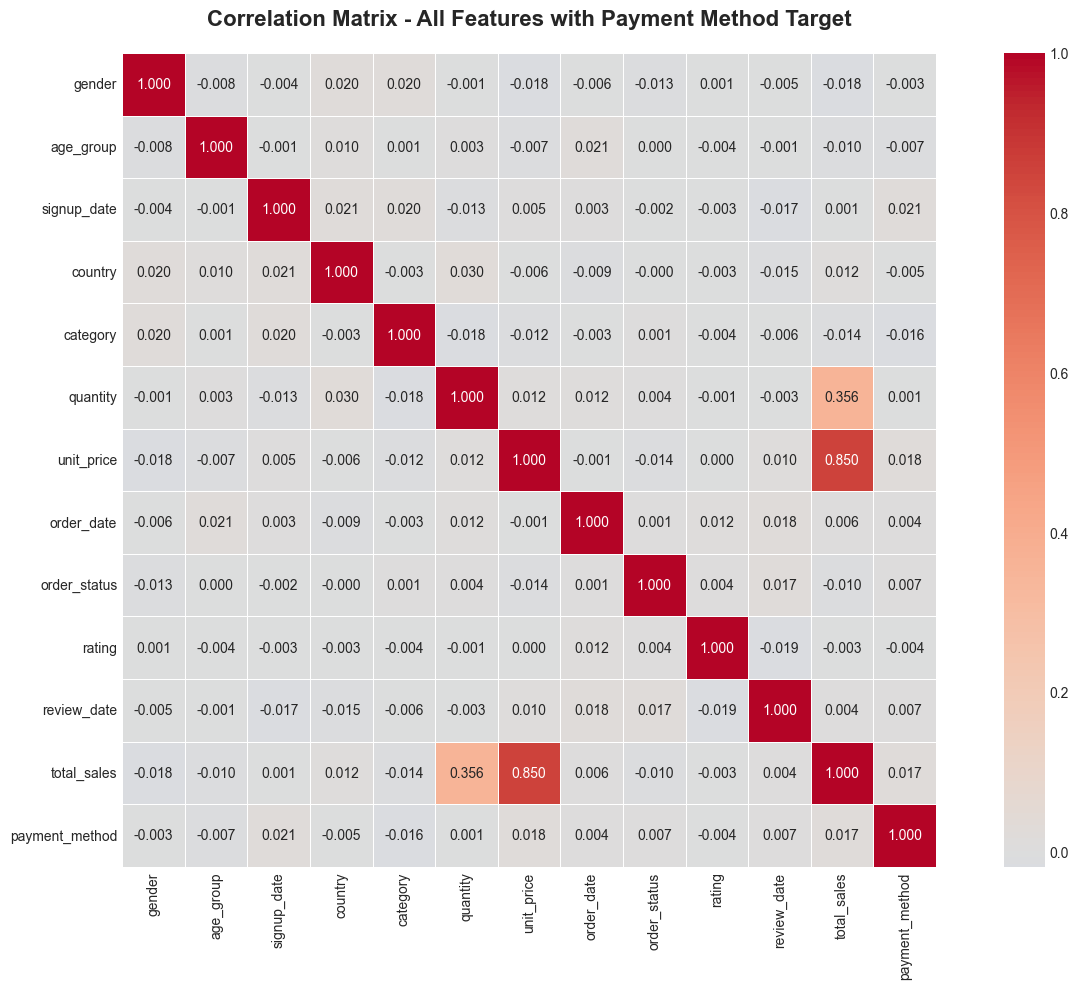


Correlation with Payment Method (Target):
--------------------------------------------------------------------------------
payment_method    1.000000
signup_date       0.021353
unit_price        0.017581
total_sales       0.017356
order_status      0.006645
review_date       0.006572
order_date        0.004016
quantity          0.000784
gender           -0.002697
rating           -0.004130
country          -0.005288
age_group        -0.007239
category         -0.015894
Name: payment_method, dtype: float64



In [19]:
# Handle categorical variables
# Encode categorical columns
label_encoders = {}
X_encoded = X.copy()

for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
        label_encoders[col] = le

# Encode target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print("Encoded features shape:", X_encoded.shape)
print("Encoded target shape:", y_encoded.shape)
print("\nTarget encoding:")
for i, label in enumerate(le_target.classes_):
    print(f"{i}: {label}")

# Create dataframe with encoded features and target for correlation analysis
df_encoded = X_encoded.copy()
df_encoded['payment_method'] = y_encoded

# Correlation Matrix with Target (Payment Method)
print("\n" + "=" * 80)
print("CORRELATION MATRIX - ALL FEATURES WITH TARGET (PAYMENT_METHOD)")
print("=" * 80)
corr_with_target = df_encoded.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_with_target, annot=True, fmt=".3f", cmap='coolwarm', 
            linewidths=0.5, center=0, square=True)
plt.title('Correlation Matrix - All Features with Payment Method Target', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show correlation with target
print("\nCorrelation with Payment Method (Target):")
print("-" * 80)
corr_target = corr_with_target['payment_method'].sort_values(ascending=False)
print(corr_target)
print("\n" + "=" * 80)


In [20]:
# Check for missing values
print("Missing values in features:")
print(X_encoded.isnull().sum().sum())

# Fill any remaining missing values
X_encoded = X_encoded.fillna(X_encoded.mean())

# NORMALISASI DATASET
print("\n" + "=" * 80)
print("NORMALISASI DATASET")
print("=" * 80)

# Normalisasi menggunakan MinMaxScaler untuk semua fitur (0-1 range)
# Normalisasi sebelum split untuk konsistensi
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X_encoded)
X_normalized = pd.DataFrame(X_normalized, columns=X_encoded.columns, index=X_encoded.index)

print("\nData sebelum normalisasi (sample 5 rows):")
print(X_encoded.head())
print("\nData setelah normalisasi (sample 5 rows):")
print(X_normalized.head())
print("\nStatistik data setelah normalisasi:")
print(X_normalized.describe())

# Split data (setelah normalisasi)
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Scale features untuk algoritma yang memerlukan scaling (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nNormalisasi selesai!")
print("=" * 80)


Missing values in features:
0

NORMALISASI DATASET

Data sebelum normalisasi (sample 5 rows):
   gender  age_group  signup_date  country  category  quantity  unit_price  \
0       0          2          603        2         2       3.0         229   
1       1          0          978        3         0       4.0          59   
2       1          1          944        5         5       2.0          59   
3       1          2         1652        4         3       4.0         399   
4       0          2          184        1         0       1.0         110   

   order_date  order_status  rating  review_date  total_sales  
0         322             2       2         1016        687.0  
1         718             2       2          345        236.0  
2         710             1       5          131        118.0  
3        1002             1       2          201       1596.0  
4         311             3       1          419        110.0  

Data setelah normalisasi (sample 5 rows):
   gender 

In [21]:
# Initialize all classification models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'Neural Network (MLP)': MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100, 50))
}

# Dictionary to store results
results = {}


In [22]:
# Train and evaluate all models
# Semua model menggunakan data yang sudah dinormalisasi
print("Training and evaluating models...")
print("Note: Semua model menggunakan data yang sudah dinormalisasi dengan MinMaxScaler")
print("=" * 60)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for models that need it (StandardScaler untuk algoritma tertentu)
    # Data sudah dinormalisasi dengan MinMaxScaler, beberapa algoritma memerlukan StandardScaler tambahan
    if name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors', 'Neural Network (MLP)']:
        # Algoritma yang memerlukan StandardScaler
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
    else:
        # Algoritma yang menggunakan data normalisasi (MinMaxScaler)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
    
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\n" + "=" * 60)


Training and evaluating models...
Note: Semua model menggunakan data yang sudah dinormalisasi dengan MinMaxScaler

Training Logistic Regression...
Logistic Regression Accuracy: 0.3457 (34.57%)

Training Decision Tree...
Decision Tree Accuracy: 0.3147 (31.47%)

Training Random Forest...
Random Forest Accuracy: 0.3432 (34.32%)

Training SVM...
SVM Accuracy: 0.3392 (33.92%)

Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.3347 (33.47%)

Training Naive Bayes...
Naive Bayes Accuracy: 0.3392 (33.92%)

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.3327 (33.27%)

Training AdaBoost...
AdaBoost Accuracy: 0.3357 (33.57%)

Training XGBoost...
XGBoost Accuracy: 0.3217 (32.17%)

Training Neural Network (MLP)...
Neural Network (MLP) Accuracy: 0.3192 (31.92%)



In [23]:
# Create results dataframe
results_df = pd.DataFrame(list(results.items()), columns=['Algorithm', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)

print("Results Summary:")
print(results_df.to_string(index=False))


Results Summary:
           Algorithm  Accuracy
 Logistic Regression  0.345673
       Random Forest  0.343172
                 SVM  0.339170
         Naive Bayes  0.339170
            AdaBoost  0.335668
 K-Nearest Neighbors  0.334667
   Gradient Boosting  0.332666
             XGBoost  0.321661
Neural Network (MLP)  0.319160
       Decision Tree  0.314657


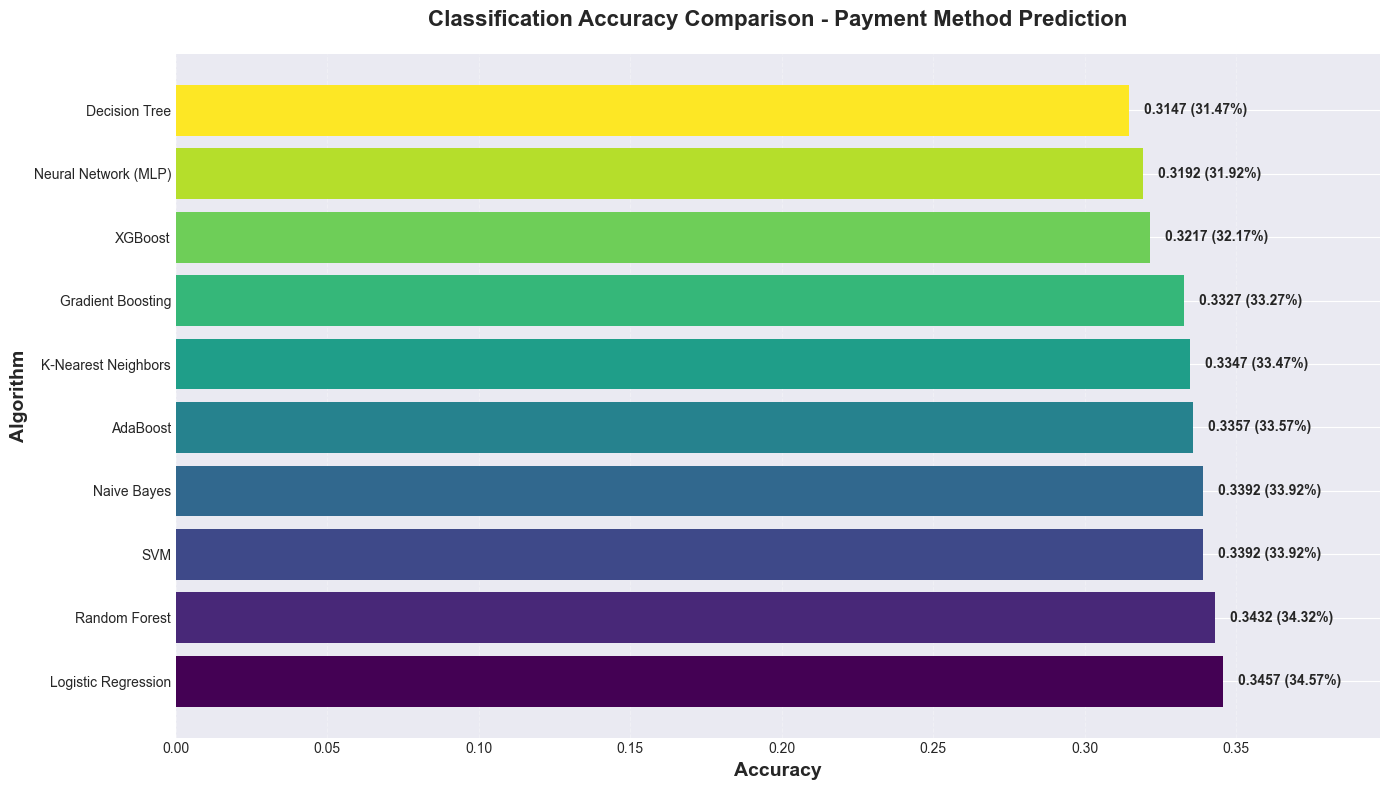


🏆 Best Model: Logistic Regression with accuracy of 0.3457 (34.57%)


In [24]:
# Visualize accuracy results with bar chart
plt.figure(figsize=(14, 8))
bars = plt.barh(results_df['Algorithm'], results_df['Accuracy'], 
                color=plt.cm.viridis(np.linspace(0, 1, len(results_df))))

# Add value labels on bars
for i, (idx, row) in enumerate(results_df.iterrows()):
    plt.text(row['Accuracy'] + 0.005, i, f"{row['Accuracy']:.4f} ({row['Accuracy']*100:.2f}%)",
             va='center', fontsize=10, fontweight='bold')

plt.xlabel('Accuracy', fontsize=14, fontweight='bold')
plt.ylabel('Algorithm', fontsize=14, fontweight='bold')
plt.title('Classification Accuracy Comparison - Payment Method Prediction', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlim([0, max(results_df['Accuracy']) * 1.15])
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Print best model
best_model = results_df.iloc[0]
print(f"\n🏆 Best Model: {best_model['Algorithm']} with accuracy of {best_model['Accuracy']:.4f} ({best_model['Accuracy']*100:.2f}%)")


Detailed Classification Reports for Top 3 Models:

Logistic Regression:
--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

Cash on Delivery       0.35      0.52      0.42       681
     Credit Card       0.33      0.29      0.31       658
          PayPal       0.37      0.22      0.27       660

        accuracy                           0.35      1999
       macro avg       0.35      0.34      0.33      1999
    weighted avg       0.35      0.35      0.33      1999



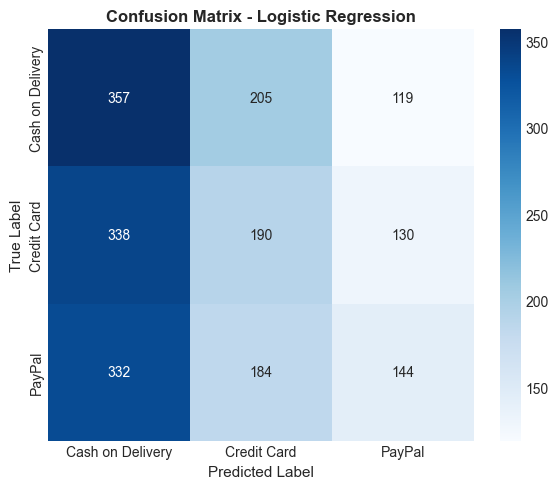


Random Forest:
--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

Cash on Delivery       0.35      0.41      0.37       681
     Credit Card       0.34      0.31      0.32       658
          PayPal       0.34      0.31      0.33       660

        accuracy                           0.34      1999
       macro avg       0.34      0.34      0.34      1999
    weighted avg       0.34      0.34      0.34      1999



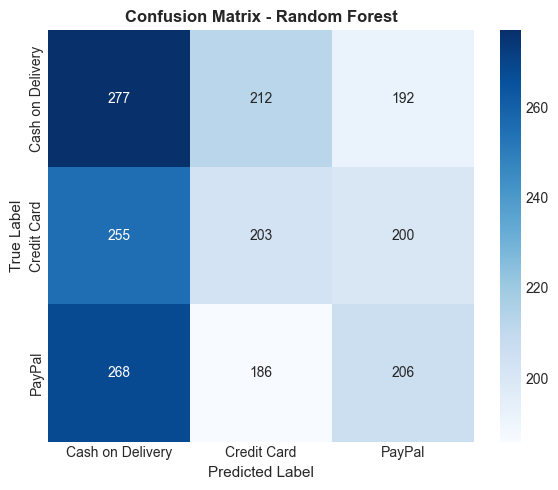


SVM:
--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

Cash on Delivery       0.35      0.42      0.38       681
     Credit Card       0.33      0.29      0.31       658
          PayPal       0.34      0.31      0.32       660

        accuracy                           0.34      1999
       macro avg       0.34      0.34      0.34      1999
    weighted avg       0.34      0.34      0.34      1999



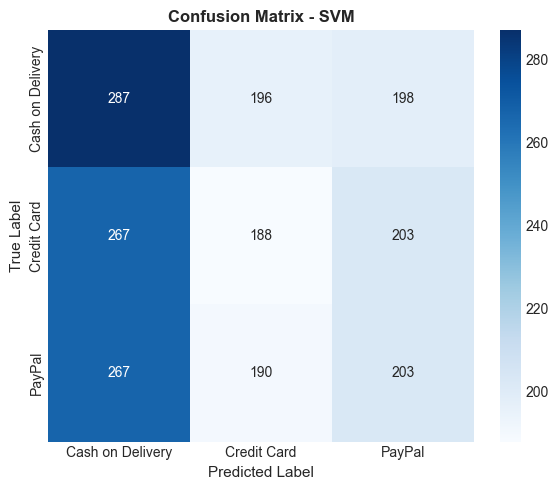

In [25]:
# Detailed evaluation of top 3 models
top_3_models = results_df.head(3)['Algorithm'].tolist()

print("Detailed Classification Reports for Top 3 Models:")
print("=" * 80)

for model_name in top_3_models:
    print(f"\n{model_name}:")
    print("-" * 80)
    model = models[model_name]
    
    if model_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors', 'Neural Network (MLP)']:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred, 
                                target_names=le_target.classes_))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le_target.classes_, 
                yticklabels=le_target.classes_)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=12, fontweight='bold')
    plt.ylabel('True Label', fontsize=11)
    plt.xlabel('Predicted Label', fontsize=11)
    plt.tight_layout()
    plt.show()
